In [ ]:
import cv2 as cv
vidcap = cv.VideoCapture(r'/users/iamns45/Downloads/CV-2/Question 1/images/Que 1.mp4')
check,image = vidcap.read()
count = 0
inc=0
while check:
    check,image = vidcap.read()
    if count%30==0 : #As i have taken a video in 30fps so i am storing one image from each frame.
      inc+=1
      cv.imwrite(r"/users/iamns45/Downloads/CV-2/Question 1/images/frame%d.jpg" % inc, image)         
    count += 1

Canny Edge Detection

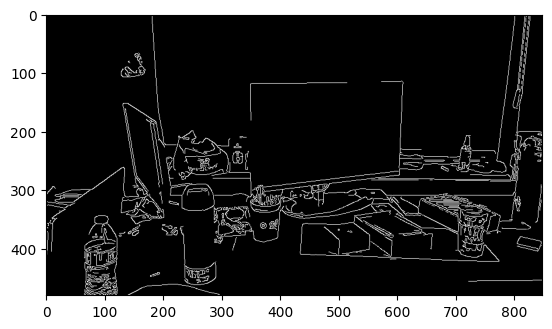

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(r'/users/iamns45/Downloads/CV-2/Question 1/images/frame3.jpg',0)
edges = cv.Canny(img,100,200)
plt.imshow(edges,cmap='gray')

Canny Edge Detection without any using inbuilt function

In [1]:
import numpy as np
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [2]:
from scipy import ndimage
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    Ix = ndimage.convolve(img, Kx)
    Iy = ndimage.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [3]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [4]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio
    lowThreshold = highThreshold * lowThresholdRatio
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

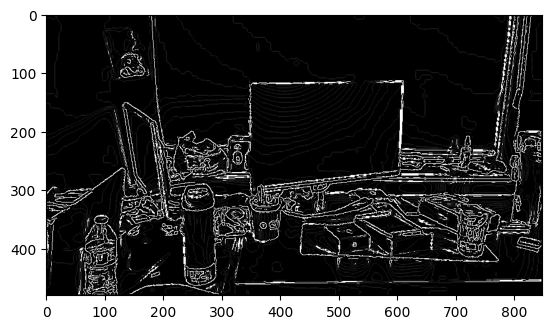

In [5]:
import matplotlib.pyplot as plt
import cv2 as cv
frame = cv.imread(r'/users/iamns45/Downloads/CV-2/Question 1/images/frame3.jpg',0)
g=gaussian_kernel(5,5)
weak_th = None 
strong_th = None    
img= cv.filter2D(src=frame, kernel=g, ddepth=19)
mag,ang=sobel_filters(img)
mag_max = np.max(mag)
c=non_max_suppression(mag,ang)
a,b,d=threshold(c)       
plt.imshow(a,cmap='gray')